# Basic Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Logistic Regression

In [2]:
data=pd.read_csv("ex2data1.txt",header=None)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
0    100 non-null float64
1    100 non-null float64
2    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [4]:
admit=data[data[2]==1]
n_admit=data[data[2]==0]

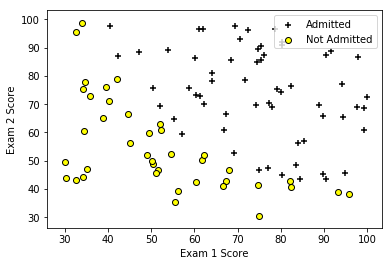

In [5]:
plt.scatter(admit.iloc[:,0],admit.iloc[:,1],marker='+',color='black')
plt.scatter(n_admit.iloc[:,0],n_admit.iloc[:,1],marker='o',color='yellow',edgecolor='black')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(['Admitted','Not Admitted'],loc='upper right')
plt.show()

In [6]:
def sigmoid (x):
    return 1/(1+np.exp(-x))

In [7]:
x=np.array(data.iloc[:,0:2])
y=np.array(data.iloc[:,2]).reshape(100,1)
m,n=x.shape
theta=np.zeros([n+1,1])
x=np.c_[np.ones(m),x]

In [15]:
def gradient(theta, x, y):
    return ((1/m) * x.T @ (sigmoid(x @ theta) - y))
gradient(theta,x,y)

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

In [9]:
def cost (theta,x,y):
    temp=sigmoid(x.dot(theta))
    ans=y.T.dot(np.log(temp))+(1-y).T.dot(np.log(1-temp))
    return ((ans/m)*-1)

In [10]:
cost(theta,x,y)

array([[0.69314718]])

In [11]:
from scipy import optimize as opt

In [12]:
temp = opt.fmin_tnc(func = cost, 
                    x0 = theta.flatten(),fprime = gradient, 
                    args = (x, y.flatten()))
#the output of above function is a tuple whose first element #contains the optimized values of theta


In [13]:
theta_optimized = temp[0]
print(theta_optimized)

[-25.16131862   0.20623159   0.20147149]


In [14]:
cost(theta_optimized,x,y)

array([0.2034977])

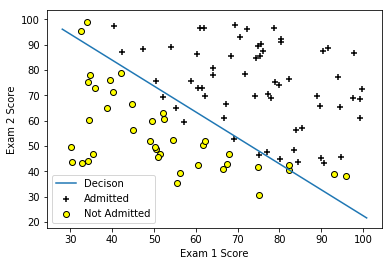

In [128]:
#plotting decision boundaary
plt.scatter(admit.iloc[:,0],admit.iloc[:,1],marker='+',color='black')
plt.scatter(n_admit.iloc[:,0],n_admit.iloc[:,1],marker='o',color='yellow',edgecolor='black')
plot_x = [np.min(x[:,1]-2), np.max(x[:,2]+2)]
plot_y = -1/theta_optimized[2]*(theta_optimized[0] 
          + np.dot(theta_optimized[1],plot_x))  
plt.plot(plot_x,plot_y)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(['Decison','Admitted','Not Admitted'])
plt.show()

In [129]:
def accuracy(x, y, theta, cutoff):
    pred = [sigmoid(np.dot(x, theta)) >= cutoff]
    acc = np.mean(pred == y)
    print(acc * 100)
accuracy(x, y.flatten(), theta_optimized, 0.5)

89.0


# Regularized logistic regression

In [224]:
data2=pd.read_csv("ex2data2.txt",header=None)

In [225]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
0    118 non-null float64
1    118 non-null float64
2    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


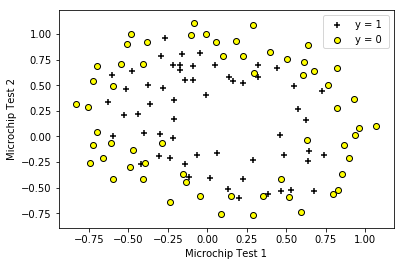

In [226]:
y_1=data2[data2[2]==1]
y_0=data2[data2[2]==0]
plt.scatter(y_1.iloc[:,0],y_1.iloc[:,1],marker='+',color='black')
plt.scatter(y_0.iloc[:,0],y_0.iloc[:,1],marker='o',color='yellow',edgecolor='black')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1','y = 0 '],loc='upper right')
plt.show()

In [227]:
x0=np.array(data2.iloc[:,0]).reshape(118,1)
x1=np.array(data2.iloc[:,1]).reshape(118,1)
x=np.array(data2.iloc[:,:-1]).reshape(118,2)
y=np.array(data2.iloc[:,2]).reshape(118,1)

In [228]:
#feature mapping
def poly_features(x0,x1):
    x_fin=np.array(np.ones([118,1]))
    for i in range(1,7):
        for j in range (i,7):
            x_fin=np.c_[x_fin,(x0**i)*(x1**j-i)]
    return x_fin
x_poly=mapFeature(x0,x1)
x_poly.shape

(118, 28)

In [229]:
m,n=x_poly.shape
theta=np.zeros([n,1])
lamda=1

In [230]:
def cost_reglog (theta,x,y,lamda):
    temp=sigmoid(x.dot(theta))
    ans=y.T.dot(np.log(temp))+(1-y).T.dot(np.log(1-temp))
    temp2=lamda*(np.linalg.norm(theta[1:]))**2
    temp2=temp2/(2*m)
    return ((ans/m)*-1)+temp2

In [231]:
cost_reglog(theta,x_poly,y,lamda)

array([[0.69314718]])

In [232]:
def gradient(theta, x, y,lamda):
    ans = np.zeros([m,1])
    ans = ((1/m) * x.T @ (sigmoid(x @ theta) - y))
    ans[1:]+=theta[1:]*(lamda/m)
    return ans

In [233]:
output = opt.fmin_tnc(func = cost_reglog, x0 = theta.flatten(), fprime = gradient,args = (x_poly, y.flatten(), lamda))
theta = output[0]
print(theta) # theta contains the optimized values

[ 1.27271026  0.62529965  1.18111686 -2.01987398 -0.91743189 -1.43166928
  0.12393228 -0.36553118 -0.35725402 -0.1751629  -1.4581701  -0.05098418
 -0.61558548 -0.27469166 -1.19271297 -0.2421784  -0.20603293 -0.04466179
 -0.27778955 -0.29539513 -0.45645982 -1.04319156  0.02779373 -0.29244876
  0.01555762 -0.32742407 -0.14389151 -0.92467487]


In [234]:
pred = [sigmoid(np.dot(x_poly, theta)) >= 0.5]
np.mean(pred == y.flatten()) * 100

83.05084745762711

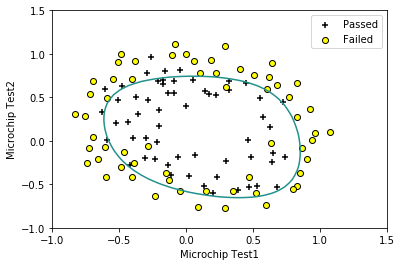

In [235]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)

passed = plt.scatter(y_1.iloc[:,0],y_1.iloc[:,1],marker='+',color='black')
failed = plt.scatter(y_0.iloc[:,0],y_0.iloc[:,1],marker='o',color='yellow',edgecolor='black')
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()